In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [17]:
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

In [19]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [20]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/Users/rishav/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [23]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1,metric = 'minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [24]:
y_pred = classifier.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix,classification_report
print confusion_matrix(y_test,y_pred)
print '\n'
print classification_report(y_test,y_pred)

[[61  7]
 [ 6 26]]


             precision    recall  f1-score   support

          0       0.91      0.90      0.90        68
          1       0.79      0.81      0.80        32

avg / total       0.87      0.87      0.87       100



In [28]:
error_rate = []

for i in range(1,40):
    classifier = KNeighborsClassifier(n_neighbors = i,metric = 'minkowski',p=2)
    classifier.fit(X_train,y_train)
    pred_i = classifier.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

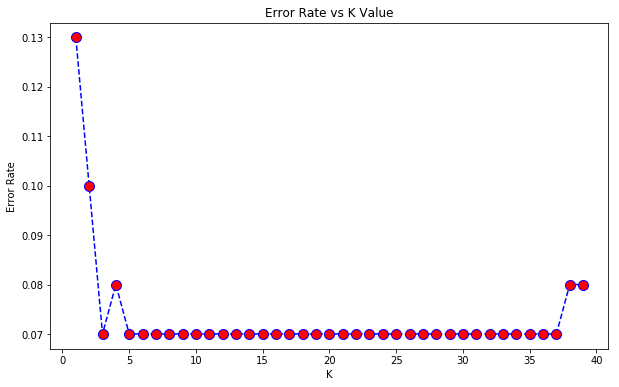

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [31]:
classifier = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski',p=2)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print confusion_matrix(y_test,y_pred)
print '\n'
print classification_report(y_test,y_pred)

[[64  4]
 [ 3 29]]


             precision    recall  f1-score   support

          0       0.96      0.94      0.95        68
          1       0.88      0.91      0.89        32

avg / total       0.93      0.93      0.93       100

